# Projeto Final - Inferência Estatística

##### Implementação dos Testes de Normalidade, Média Populacional e Homogenidade

**Discentes:**
- Carlos Freitas Santos (20230014111)
- Pedro Santana Raposo (20230014050)
- Wesley Henrique da Silva Vieira (20230014390)

**Docente:**
- Roberto Quirino

Importando Bibliotecas

In [1]:
import numpy as np, random # bibliotecas para manipulação de dados e geração de números aleatórios
#import pingouin as pg # biblioteca pingouin para análise estatística
import pandas as pd # biblioteca pandas para manipulação de dados
from scipy.stats import shapiro # teste de normalidade de Shapiro-Wilk
from scipy.stats import kstest # teste de Kolmogorov-Smirnov
import scipy.stats as stats # biblioteca scipy para funções estatísticas
from scipy.stats import ttest_ind # teste t de Student para amostras independentes
from scipy.stats import bartlett # teste de Bartlett para homogeneidade de variâncias
import matplotlib.pyplot as plt # biblioteca matplotlib para visualização de dados
import seaborn as sns # biblioteca seaborn para visualização de dados
from scipy.stats import norm # distribuição normal
from scipy.stats import t as t_dist # distribuição t de Student

### Função para gerar Amostra Aleatória

In [2]:
def gerar_amostra(tamanho=100):
    """
    Gera uma amostra de tamanho especificado a partir de distribuições variadas.
    
    Parâmetros:
    - tamanho: número de elementos desejados (máximo 500)
    
    Retorna:
    - np.ndarray com os dados amostrados
    """
    if tamanho > 5000 or tamanho <= 0:
        raise ValueError("Tamanho deve estar entre 1 e 5000.")
    
    base = random.choice([
        np.random.normal(0, 1, 5000),
        np.random.exponential(1, 5000),
        np.random.uniform(-2, 2, 5000),
        np.concatenate([np.random.normal(0, 1, 950), np.random.uniform(10, 20, 50)])
    ])
    
    return base[:tamanho]

In [3]:
amostra15 = gerar_amostra(15) # gera uma amostra de 15 elementos
amostra30 = gerar_amostra(30) # gera uma amostra de 30 elementos
amostra50 = gerar_amostra(50) # gera uma amostra de 50 elementos
amostra100 = gerar_amostra(100) # gera uma amostra de 100 elementos
amostra200 = gerar_amostra(200) # gera uma amostra de 200 elementos
amostra500 = gerar_amostra(500) # gera uma amostra de 500 elementos

print("Amostras geradas com sucesso!")
print("\nAmostra de 15 elementos:", amostra15)
print("\nAmostra de 30 elementos:", amostra30)
print("\nAmostra de 50 elementos:", amostra50)
print("\nAmostra de 100 elementos:", amostra100)
print("\nAmostra de 200 elementos:", amostra200)
print("\nAmostra de 500 elementos:", amostra500)

Amostras geradas com sucesso!

Amostra de 15 elementos: [-1.48236629 -0.40849064  0.60906032  1.34467817  0.54944916 -0.29043455
 -0.43509342 -0.09292942  1.12256036  0.30122178  1.1561825   0.39504765
 -0.73060136 -1.32288683  1.07860971]

Amostra de 30 elementos: [ 0.20328788  0.18560235  1.11676528  0.79341127 -0.46259304  1.17303669
 -0.4272212  -1.01416049 -1.29519028  0.6675412  -1.23281946  1.16536269
 -0.02565984 -0.46798562  0.51752252  0.06922551  0.94503239 -0.1203471
 -1.24619588 -0.1688917  -0.18322571  0.56221351 -1.51043497  0.88016251
 -1.73603822 -0.37360964 -1.93753198 -0.59898662 -0.05319786  1.0879656 ]

Amostra de 50 elementos: [-1.04205952 -1.77958559  0.75791854 -0.34235571  0.13515243 -0.35806247
  0.23485876 -0.84986442 -0.65854862 -0.35458511  0.26636821  0.89693665
  0.05844239 -0.48605829  1.94762357  0.51921218  0.23758422  2.09829092
  0.25535772  0.30903305 -1.51914756 -0.07989221 -0.0189934  -0.26573735
 -0.30807198 -0.41788457 -0.63608394  1.58390993  0

### Função para calcular a procentagem de acerto

In [4]:
def calcular_percentual_acerto(resultado_manual, resultado_biblioteca):
    """
    Calcula a porcentagem de acerto entre os resultados do método manual e da biblioteca.

    Parâmetros:
    - resultado_manual: valor obtido pelo método manual
    - resultado_biblioteca: valor obtido pela biblioteca

    Retorna:
    - percentual_acerto: porcentagem de acerto entre os dois métodos
    """
    percentual_acerto = (1 - abs(resultado_manual - resultado_biblioteca) / abs(resultado_biblioteca)) * 100
    return percentual_acerto

### Testes de Normalidade

Testar se seus dados seguem uma distribuição normal

Então iremos avaliar o p_valor:

- p_valor > 0.05 → dados parecem normais

- p_valor ≤ 0.05 → dados provavelmente não ser normais

#### Dados para o Kolmogorov-Smirnov

### Teste Kolmogorov-Smirnov

O **teste de Kolmogorov-Smirnov** é um teste estatístico usado para verificar se um conjunto de dados segue uma distribuição teórica específica. No contexto de testes de normalidade, ele avalia se os dados seguem uma distribuição normal.

O teste compara:

- A função de distribuição empírica dos dados

- Com a função de distribuição acumulada teórica da normal.


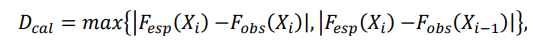

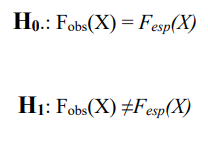

### Teste Kolmogorov-Smirnov Manual

In [5]:
def kolmogorov_smirnov(data):
    
    # Organize os dados em ordem crescente
    data_sorted = np.sort(data)
    n = len(data_sorted)
    
    # Função de distribuição empírica F_n(x)
    F_n = np.arange(1, n+1) / n
    #arange - cria um array com valores de 1 a n (inclusive) e divide 
    # por n para obter a função de distribuição empírica
    
    # Função de distribuição acumulada da normal F(x)
    F_x = norm.cdf(data_sorted)
    
    # Calcula o D máximo
    D = np.max(np.abs(F_n - F_x))
    p_value = kstest(data, 'norm')[1]

    # Calcula o p-valor usando o teste de Kolmogorov-Smirnov
    p_value = kstest(data, 'norm')[1]

    if p_value < 0.05:
        print("A amostra não é normalmente distribuída (rejeita H0)")
    else:
        print("A amostra é normalmente distribuída (não rejeita H0)")   
    return (D,p_value)

print("Amostra pequena:")
estatistica_manual, p_value_manual = kolmogorov_smirnov(data = amostra15)
print(f"Kolmogorov-Smirnov Manual: {estatistica_manual:.4f}")
print(f"p-value: {p_value_manual:.4f}")

print("\n\n")

print("Amostra grande:")
estatistica_manual, p_value_manual = kolmogorov_smirnov(data = amostra50)
print(f"Kolmogorov-Smirnov Manual: {estatistica_manual:.4f}")
print(f"p-value: {p_value_manual:.4f}")

Amostra pequena:
A amostra é normalmente distribuída (não rejeita H0)
Kolmogorov-Smirnov Manual: 0.0894
p-value: 0.8309



Amostra grande:
A amostra é normalmente distribuída (não rejeita H0)
Kolmogorov-Smirnov Manual: 0.0986
p-value: 0.6785


### Teste Kolmogorov-Smirnov Biblioteca

In [6]:
print("Amostra pequena:")
estatistica, p_valor = kstest(amostra15, 'norm')
print(f"estatística = {estatistica:.4f}, \np-valor = {p_valor:.4f}")
if p_valor < 0.05:
    print("A amostra não é normalmente distribuída (rejeita H0)")
else:
    print("A amostra é normalmente distribuída (não rejeita H0)")

print("\n\n")

print("Amostra grande:")
estatistica, p_valor = kstest(amostra50, 'norm')
print(f"estatística = {estatistica:.4f}, \np-valor = {p_valor:.4f}")
if p_valor < 0.05:
    print("A amostra não é normalmente distribuída (rejeita H0)")
else:
    print("A amostra é normalmente distribuída (não rejeita H0)")

Amostra pequena:
estatística = 0.1517, 
p-valor = 0.8309
A amostra é normalmente distribuída (não rejeita H0)



Amostra grande:
estatística = 0.0986, 
p-valor = 0.6785
A amostra é normalmente distribuída (não rejeita H0)


In [7]:
percentual_acerto = calcular_percentual_acerto(estatistica_manual, estatistica)
print(f"Porcentagem de acerto entre Manual e Biblioteca para o KS: {percentual_acerto:.2f}%")


Porcentagem de acerto entre Manual e Biblioteca para o KS: 100.00%


### Teste Shapiro-Wilk

O **teste de Shapiro-Wilk** é um dos testes mais utilizados para verificar se uma amostra segue uma distribuição normal. Ele é especialmente eficaz para tamanhos de amostra pequenos e médios

O teste compara a variância da amostra com a variância esperada caso os dados fossem normais. A estatística do teste é o W, que mede o quão bem os dados se ajustam à distribuição normal teórica.

- W próximo de 1 → forte evidência de normalidade.

- W significativamente menor que 1 → desvio da normalidade.



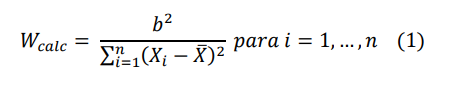

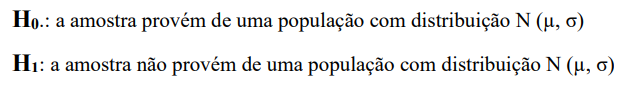

### Teste Shapiro-Wilk Manual

In [8]:
def shapiro_wilk(dados):
    # Organize os dados em ordem crescente
    dados = np.sort(dados)
    n = len(dados)
    
    # Média e desvio padrão da amostra
    media = np.mean(dados)
    desvio = np.std(dados, ddof=1)


    # Coeficientes de Shapiro aproximados a_i,n
    # Para isso usamos quantis da normal padrão
    # - 0.375: quantil 0.375 da normal padrão
    # - 0.25: quantil 0.25 da normal padrão
    # O 0.375 e o 0.25 são valores empíricos usados para aproximar a distribuição dos coeficientes 
    # a_i,n, que são os coeficientes de Shapiro-Wilk.
    
    prob = []
    for i in range(1, n + 1):
        prob_value = (i - 0.375) / (n + 0.25)
        prob.append(prob_value)
    
    b = norm.ppf(prob) #ppf é a função de quantil da normal padrão
    b = b / np.linalg.norm(b)  # Normaliza m
    #linag.norm(b) é a norma do vetor b, que é a soma dos quadrados dos coeficientes de Shapiro-Wilk.

    # Soma ponderada dos dados ordenados com os coeficientes m
    W_numerador = (np.sum(b * dados))**2
    W_denominador = np.sum((dados - media)**2)

    W = W_numerador / W_denominador
    p_valor = shapiro(dados)[1]

    if p_valor < 0.05:
        print("A amostra não é normalmente distribuída (rejeita H0)")
    else:
        print("A amostra é normalmente distribuída (não rejeita H0)")
    return (W, p_valor)


print("Amostra pequena:")
estatistica_manual, p_value_manual = shapiro_wilk(amostra30)
print(f"Shapiro-Wilk Manual: {estatistica_manual:.4f}")
print(f"p-value: {p_value_manual:.4f}")

print("\n\n")

print("Amostra grande:")
estatistica_manual, p_value_manual = shapiro_wilk(amostra200)
print(f"Shapiro-Wilk Manual: {estatistica_manual:.4f}")
print(f"p-value: {p_value_manual:.4f}")


Amostra pequena:
A amostra é normalmente distribuída (não rejeita H0)
Shapiro-Wilk Manual: 0.9643
p-value: 0.1841



Amostra grande:
A amostra é normalmente distribuída (não rejeita H0)
Shapiro-Wilk Manual: 0.9952
p-value: 0.7804


### Teste Shapiro-Wilk Biblioteca


In [9]:
print("Amostra pequena:")
estatistica, p_valor = shapiro(amostra30)
print(f"estatística = {estatistica:.4f}, \np-valor = {p_valor:.4f}")
if p_valor <= 0.05:
    print("A amostra não é normalmente distribuída (rejeita H0)")
else:
    print("A amostra é normalmente distribuída (não rejeita H0)")

print("\n\n")

print("Amostra grande:")
estatistica, p_valor = shapiro(amostra200)
print(f"estatística = {estatistica:.4f}, \np-valor = {p_valor:.4f}")
if p_valor <= 0.05:
    print("A amostra não é normalmente distribuída (rejeita H0)")
else:
    print("A amostra é normalmente distribuída (não rejeita H0)")

Amostra pequena:
estatística = 0.9514, 
p-valor = 0.1841
A amostra é normalmente distribuída (não rejeita H0)



Amostra grande:
estatística = 0.9952, 
p-valor = 0.7804
A amostra é normalmente distribuída (não rejeita H0)


In [10]:
percentual_acerto = calcular_percentual_acerto(estatistica_manual, estatistica)
print(f"Porcentagem de acerto entre Manual e Biblioteca para o SW: {percentual_acerto:.2f}%")

Porcentagem de acerto entre Manual e Biblioteca para o SW: 100.00%


### Teste Shapiro-Francia

O teste de Shapiro-Francia é uma variação do teste de Shapiro-Wilk, idealizado especialmente para detectar desvios da normalidade em amostras maiores. Ele é mais simples e rápido de computar, pois usa quantis normais no lugar de coeficientes tabelados.

Hipóteses:
​
- H0: Os dados seguem uma distribuição normal.
- H1: : Os dados não seguem uma distribuição normal

Se o W Se estiver muito distante de 1, a normalidade pode ser rejeitada

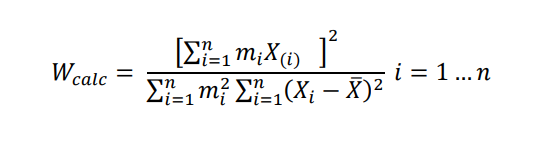

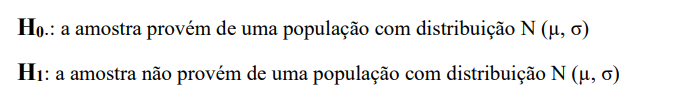

### Teste Shapiro-Francia Manual

In [11]:
def shapiro_francia_test(x):
    # Ordena os dados da amostra
    x = np.sort(x)
    n = len(x)

    # Calcula a média dos dados ordenados
    x_media = np.mean(x)

    # Gera os quantis esperados da normal padrão usando posições ajustadas (probabilidades simuladas)
    # Essa fórmula é uma heurística comum para gerar quantis simétricos
    # Estou usando isso para evitar o uso de coeficientes a_i,n, que são tabelados e não são facilmente acessíveis
    # O 0.375 e o 0.25 são valores empíricos usados para aproximar a distribuição dos coeficientes
    # ppf é a função de quantil da normal padrão
    m = norm.ppf([(i - 0.375) / (n + 0.25) for i in range(1, n + 1)])
    m_media = np.mean(m)

    # Coeficientes a_i normalizados
    # Subtrai a média de m para centralizar os dados e depois normaliza
    u = m - m_media
    a = u / np.sqrt(np.sum(u ** 2))  # Normaliza os coeficientes

    # Cálculo do numerador do W': soma ponderada dos dados ordenados elevada ao quadrado
    numerador = (np.sum(a * x)) ** 2

    # Cálculo do denominador do W': soma dos quadrados das diferenças em relação à média
    denominador = np.sum((x - x_media) ** 2)

    # Estatística do teste de Shapiro-Francia
    W_calc = numerador / denominador

    # P-valor: aqui usamos a função shapiro do scipy apenas para obter o p-valor como aproximação, ja
    # não é o mesmo teste, mas é uma aproximação razoável, pois não existe biblioteca padrão para o teste 
    # de Shapiro-Francia
    p_value = shapiro(x)[1]

    if p_value < 0.05:
        print("A amostra não é normalmente distribuída (rejeita H0)")
    else:
        print("A amostra é normalmente distribuída (não rejeita H0)")

    return (W_calc, p_value)

print("Amostra pequena:")
stat, p = shapiro_francia_test(amostra30)
print(f"Shapiro-Francia: W' = {stat:.4f}, p-valor = {p:.4f}")

print("\n\n")

print("Amostra grande:")
stat, p = shapiro_francia_test(amostra500)
print(f"Shapiro-Francia: W' = {stat:.4f}, p-valor = {p:.4f}")



Amostra pequena:
A amostra é normalmente distribuída (não rejeita H0)
Shapiro-Francia: W' = 0.9643, p-valor = 0.1841



Amostra grande:
A amostra é normalmente distribuída (não rejeita H0)
Shapiro-Francia: W' = 0.9947, p-valor = 0.0733


### Testes de Homogeneidade de variâncias

O teste de homogeneidade verifica se duas ou mais populações têm variâncias (ou distribuições) iguais.

Então iremos avaliar o p_valor:

- p > 0.05 → as variâncias são provavelmente iguais

- p ≤ 0.05 → as variâncias são provavelmente diferentes

In [12]:
grupo1 = random.choice([
    np.random.normal(0, 1, 20),
    np.random.exponential(1, 20),
    np.random.uniform(-2, 2, 20),
    np.concatenate([np.random.normal(0, 1, 20), np.random.uniform(10, 20, 20)])
])

grupo2 = random.choice([
    np.random.normal(0, 1, 20),
    np.random.exponential(1, 20),
    np.random.uniform(-2, 2, 20),
    np.concatenate([np.random.normal(0, 1, 20), np.random.uniform(10, 20, 20)])
])

In [13]:
grupo1

array([-1.10998059, -1.85831652, -0.0437713 , -2.06832838,  0.48696222,
        0.49099418,  0.31346324, -1.39380386, -0.31841915, -0.55593985,
        1.19792648,  1.2643274 ,  0.64658626,  1.24412546, -0.43272518,
       -0.65468711, -0.22420775,  2.51843722, -0.91491699, -1.25803997,
       11.579435  , 18.69912425, 13.90741576, 13.87644515, 16.30095086,
       15.67154816, 12.91896293, 14.66610851, 15.95703968, 14.15501316,
       16.03367153, 15.53689263, 14.63187328, 14.17677783, 12.01953971,
       10.00455343, 14.53770064, 18.22958861, 19.13928117, 13.76985835])

In [14]:
grupo2

array([0.48888509, 0.35185348, 0.43932382, 0.91196629, 1.53407011,
       2.80561154, 1.10204461, 2.04893505, 0.04645178, 0.68870829,
       1.85785061, 1.09019248, 0.21145887, 1.75940604, 0.22038473,
       1.54313355, 0.18102554, 0.02801761, 0.21614083, 0.25107477])

### Teste Bartlett - Manual

In [15]:
import math
def bartlett_duas_amostras(amostra1, amostra2):
    """
    Realiza o teste de Bartlett para comparar as variâncias de duas amostras,
    verificando se elas vêm de populações com variâncias homogêneas.

    Parâmetros:
    - amostra1: lista ou array com os dados da primeira amostra
    - amostra2: lista ou array com os dados da segunda amostra

    Retorna:
    - estatistica: valor da estatística do teste de Bartlett
    - p_valor: valor p para o teste
    """
    
    # Número de observações em cada amostra
    n1, n2 = len(amostra1), len(amostra2)

    # Média das amostras
    media1 = sum(amostra1) / n1
    media2 = sum(amostra2) / n2

    # Variância das amostras (usando fórmula amostral)
    var1 = sum((x - media1)**2 for x in amostra1) / (n1 - 1)
    var2 = sum((x - media2)**2 for x in amostra2) / (n2 - 1)

    # Variância combinada
    sp = ((n1 - 1)*var1 + (n2 - 1)*var2) / (n1 + n2 - 2)

    # Estatística A (baseada nas variâncias)
    A = (n1 + n2 - 2) * math.log(sp) - (n1 - 1) * math.log(var1) - (n2 - 1) * math.log(var2) #q

    # Estatística B, que leva em consideração o número de observações
    B = 1 + (1 / (3 * (2 - 1))) * (1 / (n1 - 1) + 1 / (n2 - 1) - 1 / (n1 + n2 - 2)) #c

    # Estatística do teste de Bartlett
    estatistica = A / B

    # Calcular o p-valor usando a distribuição qui-quadrado (chi2) com 1 grau de liberdade
    #stats.chi2 - distribuição qui-quadrado
    p_valor = 1 - stats.chi2.cdf(estatistica, df=1)

    return estatistica, p_valor

In [16]:
estatistica, p_valor = bartlett_duas_amostras(grupo1, grupo2)

# Exibir os resultados
print(f"Estatística do teste de Bartlett: {estatistica:.4f}")
print(f"P-valor: {p_valor:.4f}")
print("A amostra é homogênea (não rejeita H0)" if p_valor > 0.05 else "A amostra não é homogênea (rejeita H0)")

Estatística do teste de Bartlett: 62.5531
P-valor: 0.0000
A amostra não é homogênea (rejeita H0)


### Teste Barlett - Biblioteca

In [17]:
stat, p = bartlett(grupo1, grupo2)
print(f"Bartlett: estatística = {stat:.4f}, p-valor = {p:.4f}")
#bartlett - teste de Bartlett para homogeneidade de variâncias
if p <= 0.05:
    print("Uma ou mais variâncias são diferentes, não são homogêneas (rejeita H0)")
else:
    print("Todas as variâncias são significamente iguais, são homogêneas (não rejeita H0)")

Bartlett: estatística = 62.5531, p-valor = 0.0000
Uma ou mais variâncias são diferentes, não são homogêneas (rejeita H0)


In [18]:
print("Variancia grupo1:", np.var(grupo1, ddof=1))
print("Variancia grupo2:", np.var(grupo2, ddof=1))

Variancia grupo1: 60.35210588954089
Variancia grupo2: 0.6344564675946385


In [19]:
porcentual_acerto = calcular_percentual_acerto(estatistica, stat)
print(f"Porcentagem de acerto entre Manual e Biblioteca para o Bartlett: {porcentual_acerto:.2f}%")

Porcentagem de acerto entre Manual e Biblioteca para o Bartlett: 100.00%


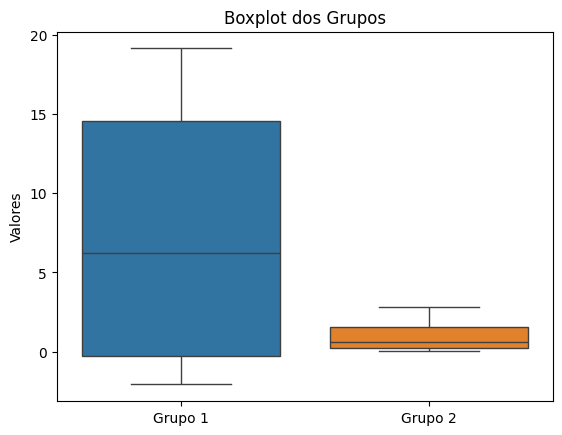

In [20]:
sns.boxplot(data=[grupo1, grupo2])
plt.xticks([0, 1], ['Grupo 1', 'Grupo 2'])
plt.title('Boxplot dos Grupos')
plt.ylabel('Valores')
plt.show()

### Dados para Teste de Média Populacional

Comparar se a média de dois grupos é diferente

Nível de Significância (α) - É o limite máximo que você aceita para cometer um erro tipo I (rejeitar a hipótese nula quando ela é verdadeira).


Comparar o p-valor que é a probabilidade de obter um resultado tão extremo quanto o observado, assumindo que a hipótese nula é verdadeira.

Então iremos avaliar o p_valor:

- p > 0.05 → as médias são provavelmente iguais

- p ≤ 0.05 → as médias são provavelmente diferentes

In [21]:
grupo1 = np.random.normal(0, 1, 20)
grupo2 = np.random.normal(0, 1, 20)

In [22]:
grupo1

array([ 0.62635076,  0.42108788, -0.96762337, -0.54002306, -1.75816748,
       -0.08279949,  1.02687946, -1.58504899, -1.88274165,  2.67019467,
       -1.48097097,  0.13798311,  0.96622375,  0.59417981,  0.73696171,
        0.83468136,  0.50929702, -1.02288823,  1.98182677,  0.40161361])

In [23]:
grupo2

array([-0.76911824, -0.11298305, -0.12474516, -1.30726672, -1.09052583,
        0.46371521,  0.73786938, -2.26987887, -0.67731677, -0.02224809,
        1.50402643,  1.76944817,  0.11744552,  0.38687211, -0.42463879,
        1.22209446, -0.31948443, -1.18227388,  0.05199735, -0.76635519])

### Teste Z

### Teste Z manual

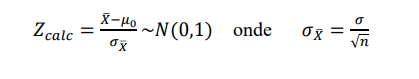

In [24]:
def teste_z_duas_amostras(grupo1, grupo2, sigma1, sigma2):
    n1, n2 = len(grupo1), len(grupo2)
    media1, media2 = np.mean(grupo1), np.mean(grupo2)

    # Fórmula do Z para duas amostras com desvio conhecido
    z = (media1 - media2) / np.sqrt((sigma1**2)/n1 + (sigma2**2)/n2)

    # P-valor para teste bilateral
    p_valor = 2 * (1 - norm.cdf(abs(z)))

    return z, p_valor

In [25]:
z, p = teste_z_duas_amostras(grupo1, grupo2, sigma1=1, sigma2=1)

In [26]:
print(f"Z = {z:.4f}")
print(f"P-valor = {p:.4f}")

Z = 0.6958
P-valor = 0.4866


In [27]:
if p < 0.05:
    print("Rejeita H0: diferença estatisticamente significativa.")
else:
    print("Não rejeita H0: não há evidência forte de diferença.")

Não rejeita H0: não há evidência forte de diferença.


### Teste TStudent

O teste t de Student é um teste estatístico usado para determinar se há uma diferença significativa entre as médias de dois grupos (ou entre a média de um grupo e um valor conhecido)

### Tstudent uma amostra -  manual

Comparar a média de uma amostra com um valor conhecido, no caso mu = 0

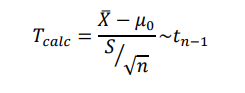

In [28]:
def teste_t_amostra(grupo, mu=0, alpha=0.05):
    """
    Realiza o teste t para uma amostra.

    Parâmetros:
    - grupo: array-like, dados da amostra
    - mu: valor da média populacional para o teste (default = 0) para testar se a média da amostra é diferente de 0
    - alpha: nível de significância (default = 0.05)

    Retorna:
    - t_calculado: valor t da amostra
    - mu: média populacional hipotética
    - alpha: nível de significância
    """

    # Calcular a média da amostra
    media_amostra = np.mean(grupo)

    # Calcular o desvio padrão amostral (ddof=1 -> desvio amostral)
    desvio_amostra = np.std(grupo, ddof=1)

    # Número de observações na amostra
    n = len(grupo)

    # Calcular o valor t
    t_calculado = (media_amostra - mu) / (desvio_amostra / np.sqrt(n))

    # Graus de liberdade
    df = n - 1

    # Valor crítico t (teste bilateral: alpha/2 em cada cauda)
    # ppf (Percent-Point Function) retorna o valor t crítico correspondente a uma probabilidade cumulativa
    t_critico = t_dist.ppf(1 - alpha / 2, df)

    

    return t_calculado, df

In [29]:
t_calculado, df = teste_t_amostra(grupo1)
print(f"Valor t calculado: {t_calculado:.4f}")
print(f"Graus de liberdade: {df}")

Valor t calculado: 0.2865
Graus de liberdade: 19


### Tstudent uma amostra - Biblioteca

In [30]:
mu = 0
t_stat, p_value = stats.ttest_1samp(grupo1, mu)
#stats - biblioteca de estatísticas do scipy
#ttest_1samp - teste t para uma amostra

In [31]:
print(f"Valor t calculado: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Decisão sobre a hipótese nula
alpha = 0.05
if p_value < alpha:
    print("Rejeitar H0: A média da amostra é significativamente diferente de", mu)
else:
    print("Não rejeitar H0: A média da amostra não é significativamente diferente de", mu)

Valor t calculado: 0.2865
Valor p: 0.7776
Não rejeitar H0: A média da amostra não é significativamente diferente de 0


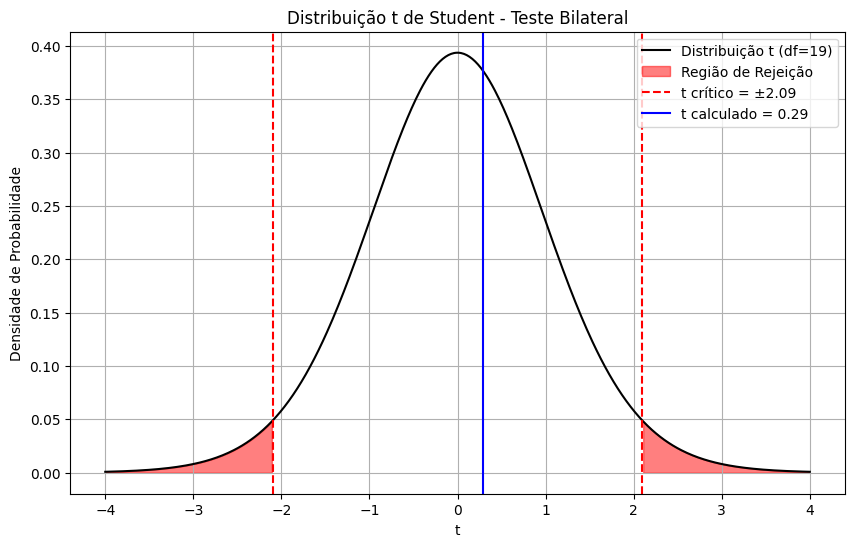

In [32]:
def plot_t_student_bilateral(t_calculado, df, alpha=0.05):
    """
    Plota a distribuição t de Student para um teste bilateral,
    destacando as regiões de rejeição e o valor t calculado.

    Parâmetros:
    - t_calculado: valor t da amostra
    - df: graus de liberdade (n - 1)
    - alpha: nível de significância (default = 0.05)
    """

    # Gerar valores t no intervalo
    t_vals = np.linspace(-4, 4, 500)
    
    # Obter densidade de probabilidade
    #pdf - função densidade de probabilidade
    pdf = t_dist.pdf(t_vals, df)

    # Valores críticos para o teste bilateral
    # ppf - Percent-Point Function (inversa da CDF)
    t_critico = t_dist.ppf(1 - alpha/2, df)

    # Plotar a curva da distribuição t
    plt.figure(figsize=(10, 6))
    plt.plot(t_vals, pdf, label=f"Distribuição t (df={df})", color="black")

    # Preencher regiões de rejeição (caudas)
    plt.fill_between(t_vals, 0, pdf, where=(t_vals <= -t_critico), color='red', alpha=0.5, label="Região de Rejeição")
    plt.fill_between(t_vals, 0, pdf, where=(t_vals >= t_critico), color='red', alpha=0.5)

    # Marcar valor t crítico (positivo e negativo)
    plt.axvline(x=-t_critico, color='red', linestyle='--', label=f"t crítico = ±{t_critico:.2f}")
    plt.axvline(x=t_critico, color='red', linestyle='--')

    # Marcar valor t calculado
    plt.axvline(x=t_calculado, color='blue', linestyle='-', label=f"t calculado = {t_calculado:.2f}")

    # Configurações do gráfico
    plt.title('Distribuição t de Student - Teste Bilateral')
    plt.xlabel('t')
    plt.ylabel('Densidade de Probabilidade')
    plt.legend()
    plt.grid(True)
    plt.show()

df = len(grupo1) - 1
plot_t_student_bilateral(t_calculado, df)

### Tstudent Independente - Manual

Comparar as médias de dois grupos independentes.

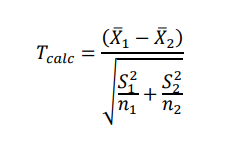

In [33]:
import math
def t_student_duas_amostras(amostra1, amostra2, alpha=0.05):
    """
    Calcula o valor t para comparação de duas amostras independentes 
    assumindo variâncias iguais (teste t para duas amostras).

    Parâmetros:
    - amostra1: dados da primeira amostra
    - amostra2: dados da segunda amostra
    - alpha: nível de significância (default = 0.05)

    Retorna:
    - t_calculado: valor t obtido (se as variâncias forem diferentes)
    - df: graus de liberdade (se as variâncias forem diferentes)
    - mensagem: mensagem indicando se as variâncias são iguais
    """

    # Teste de Bartlett para homogeneidade de variâncias
    stat, p_valor = bartlett(amostra1, amostra2)
    if p_valor > alpha:
        return "As variâncias são homogêneas (não rejeita H0). Cálculo interrompido."

    # Tamanho das amostras
    n1, n2 = len(amostra1), len(amostra2)

    # Médias das amostras
    media1 = sum(amostra1) / n1
    media2 = sum(amostra2) / n2

    # Variâncias amostrais
    var1 = sum((x - media1)**2 for x in amostra1) / (n1 - 1)
    var2 = sum((x - media2)**2 for x in amostra2) / (n2 - 1)

    # Variância combinada (assumindo variâncias diferentes)
    sp = math.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))

    # Valor t calculado
    t_calculado = (media1 - media2) / (sp * math.sqrt(1/n1 + 1/n2))

    # Graus de liberdade
    df = n1 + n2 - 2

    return t_calculado, df, media1, media2


In [45]:
bartlett_p = bartlett(grupo1, grupo2)[1]  # Calcula o p-valor do teste de Bartlett

result = t_student_duas_amostras(grupo1, grupo2)

if bartlett_p <= alpha:  # Verifica se as variâncias não são homogêneas
	if isinstance(result, str):  # Verifica se o resultado é uma mensagem
		print(result)
	else:
		t_calculado, df, media1, media2 = result
		print(f"Valor t calculado: {t_calculado:.4f}")
		print(f"Graus de liberdade: {df}")
		print(f"Média amostra 1: {media1:.4f}")
		print(f"Média amostra 2: {media2:.4f}")
else:
	print("As variâncias são homogêneas (não rejeita H0 no teste de Bartlett).")

As variâncias são homogêneas (não rejeita H0 no teste de Bartlett).


### Tstudent Independente - Biblioteca

In [46]:
bartlett_p = bartlett(grupo1, grupo2)[1]

if bartlett_p <= 0.05:
    print("Uma ou mais variâncias são diferentes, não são homogêneas (rejeita H0)")
    stat, p = ttest_ind(grupo1, grupo2, equal_var=False)
    print(f"t-Student: estatística = {stat:.4f}, p-valor = {p:.4f}")
else:
    print("Todas as variâncias são significamente iguais, são homogêneas (não rejeita H0)")


Todas as variâncias são significamente iguais, são homogêneas (não rejeita H0)


In [47]:
if p <= 0.05:
    print("As médias são diferentes (rejeita H0)")
else:  
    print("As médias são significativamente iguais (não rejeita H0)")

As médias são significativamente iguais (não rejeita H0)


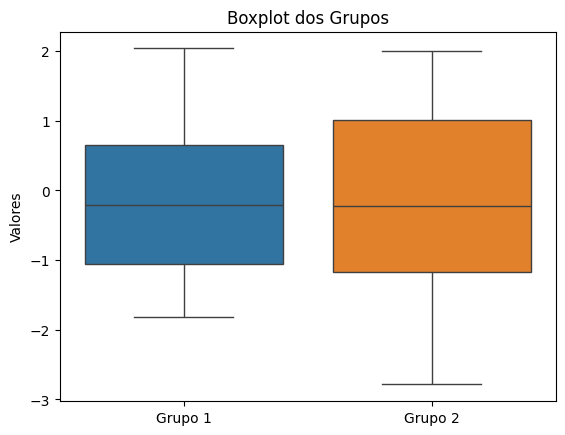

In [48]:
sns.boxplot(data=[grupo1, grupo2])
plt.xticks([0, 1], ['Grupo 1', 'Grupo 2'])
plt.title('Boxplot dos Grupos')
plt.ylabel('Valores')
plt.show()

### Tstudent Emparelhado - Manual

In [49]:
grupo1 = random.choice([
    np.random.normal(0, 1, 20),
    np.random.exponential(1, 20),
    np.random.uniform(-2, 2, 20),
    np.concatenate([np.random.normal(0, 1, 10), np.random.uniform(10, 20, 10)])  
])

# Simulando uma mudança no grupo (grupo2) para amostras pareadas
grupo2 = grupo1 + np.random.normal(0, 0.5, 20)

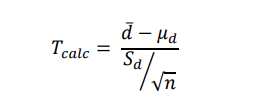

In [50]:
def t_student_amostras_emparelhadas(grupo1, grupo2, alpha=0.05):
    """
    Realiza o teste t de Student para amostras emparelhadas, comparando as médias das diferenças.
    Verifica a homogeneidade de variâncias usando o teste de Bartlett antes de continuar.

    Parâmetros:
    - grupo1: dados da primeira amostra
    - grupo2: dados da segunda amostra
    - alpha: nível de significância (default = 0.05)

    Retorna:
    - t_calculado: valor t obtido (se as variâncias forem homogêneas)
    - p_valor: valor p para o teste (se as variâncias forem homogêneas)
    - rejeitar_H0: booleano indicando se H0 é rejeitada (se as variâncias forem homogêneas)
    - df: graus de liberdade (se as variâncias forem homogêneas)
    - mensagem: mensagem indicando o resultado do teste de Bartlett
    """
    # Teste de Bartlett para homogeneidade de variâncias
    stat, p_valor_bartlett = bartlett(grupo1, grupo2)
    if p_valor_bartlett <= alpha:
        return None, None, None, None, "As variâncias não são homogêneas (rejeita H0 no teste de Bartlett). Cálculo interrompido."

    # Calcular as diferenças (d = grupo1 - grupo2)
    diferencas = np.array(grupo1) - np.array(grupo2)

    # Calcular a média das diferenças (d_bar)
    media_diferencas = np.mean(diferencas)

    # Calcular o desvio padrão das diferenças (s_d) - amostral
    desvio_diferencas = np.std(diferencas, ddof=1)

    # Número de pares
    n = len(diferencas)

    # Calcular o valor t
    t_calculado = media_diferencas / (desvio_diferencas / np.sqrt(n))

    # Calcular os graus de liberdade (df)
    df = n - 1

    # Calcular o p-valor
    p_valor = 2 * (1 - t_dist.cdf(abs(t_calculado), df))

    # Determinar se devemos rejeitar H0
    rejeitar_H0 = p_valor < alpha

    return t_calculado, p_valor, rejeitar_H0, df, "As variâncias são homogêneas (não rejeita H0 no teste de Bartlett)."


In [51]:
t_calculado, p_valor, rejeitar_H0, df, mensagem = t_student_amostras_emparelhadas(grupo1, grupo2)

if mensagem:
	print(mensagem)
	if "homogêneas" in mensagem:
		print(f"Valor t calculado: {t_calculado:.4f}")
		print(f"p-valor: {p_valor:.4f}")
		print(f"Graus de liberdade: {df}")
		print(f"Rejeitar H0? {'Sim' if rejeitar_H0 else 'Não'}")
else:
	print("Erro ao calcular o teste.")

As variâncias são homogêneas (não rejeita H0 no teste de Bartlett).
Valor t calculado: -0.4572
p-valor: 0.6527
Graus de liberdade: 19
Rejeitar H0? Não


### Tsudent Emparelhado - Biblioteca

In [52]:
t_stat, p_value = stats.ttest_rel(grupo1, grupo2)
print(f"Estatística t: {t_stat:.4f}")
print(f"P-valor: {p_value:.4f}")

#stats - biblioteca de estatísticas do scipy
#ttest_rel - teste t para amostras emparelhadas

Estatística t: -0.4572
P-valor: 0.6527


In [53]:
if p_value < 0.05:
    print("Rejeitamos H0: As médias dos dois grupos pareados são diferentes.")
else:
    print("Não rejeitamos H0: As médias dos dois grupos pareados são significadamente iguais.")

Não rejeitamos H0: As médias dos dois grupos pareados são significadamente iguais.


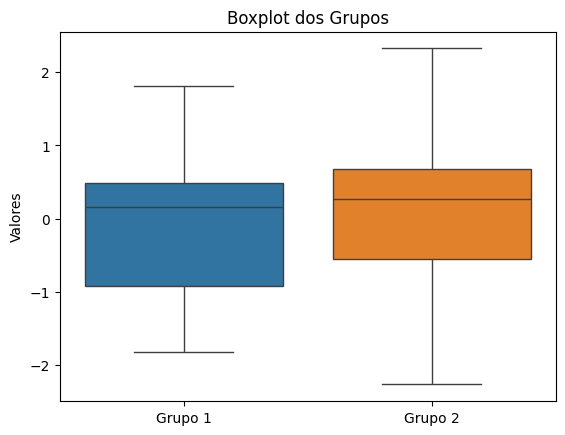

In [54]:
sns.boxplot(data=[grupo1, grupo2])
plt.xticks([0, 1], ['Grupo 1', 'Grupo 2'])
plt.title('Boxplot dos Grupos')
plt.ylabel('Valores')
plt.show()